In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-quality/apple_quality.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../input/apple-quality/apple_quality.csv")

In [4]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [6]:
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(4000, 9)

In [9]:
df = df.drop(['A_id'],axis=1)

In [10]:
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [11]:
df['Quality'].value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

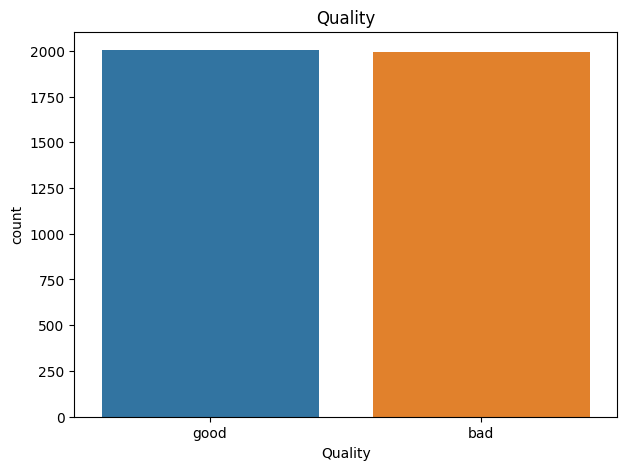

In [12]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='Quality')
plt.title('Quality')
plt.show()

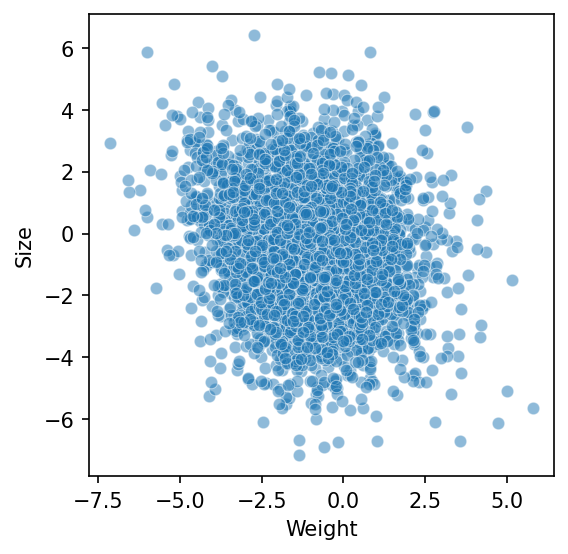

In [13]:
# size vs weight
plt.figure(figsize=(4,4),dpi=150)
sns.scatterplot(data=df,x='Weight',y='Size',alpha=0.5)
plt.show()

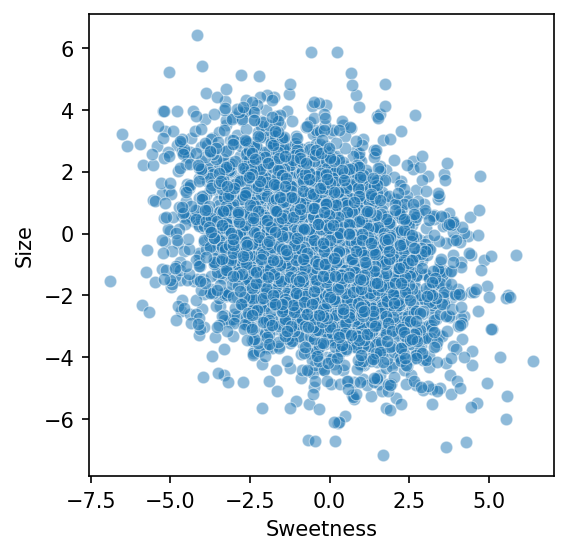

In [14]:
#Size vs sweetness
plt.figure(figsize=(4,4),dpi=150)
sns.scatterplot(data=df,x='Sweetness',y='Size',alpha=0.5)
plt.show()

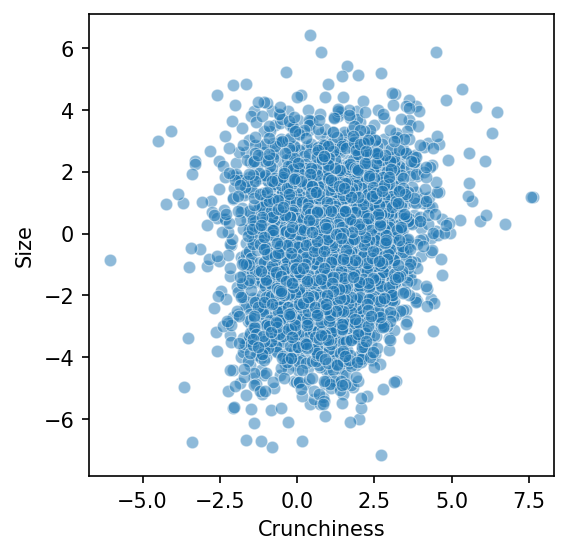

In [15]:
#size vs Chrunchiness
plt.figure(figsize=(4,4),dpi=150)
sns.scatterplot(data=df,x='Crunchiness',y='Size',alpha=0.5)
plt.show()

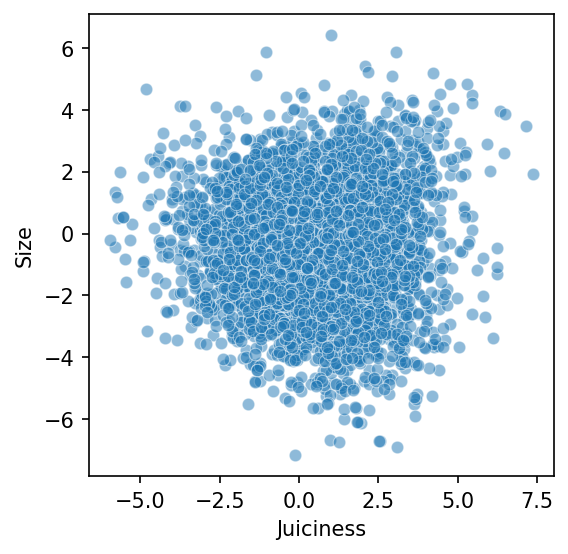

In [16]:
#Size vs Juiciness
plt.figure(figsize=(4,4),dpi=150)
sns.scatterplot(data=df,x='Juiciness',y='Size',alpha=0.5)
plt.show()

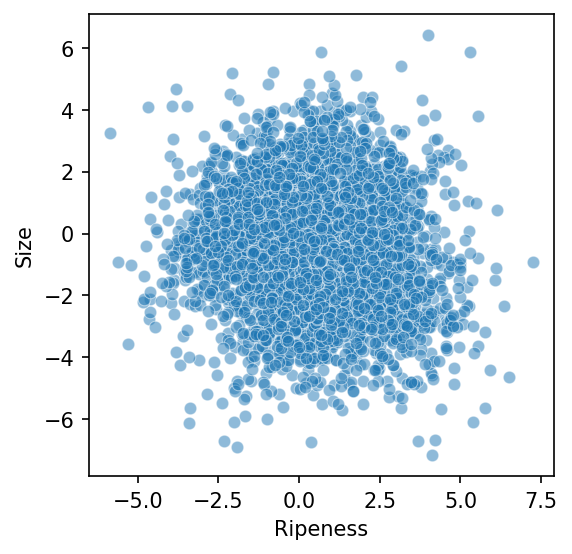

In [17]:
#Size vs Ripeness
plt.figure(figsize=(4,4),dpi=150)
sns.scatterplot(data=df,x='Ripeness',y='Size',alpha=0.5)
plt.show()

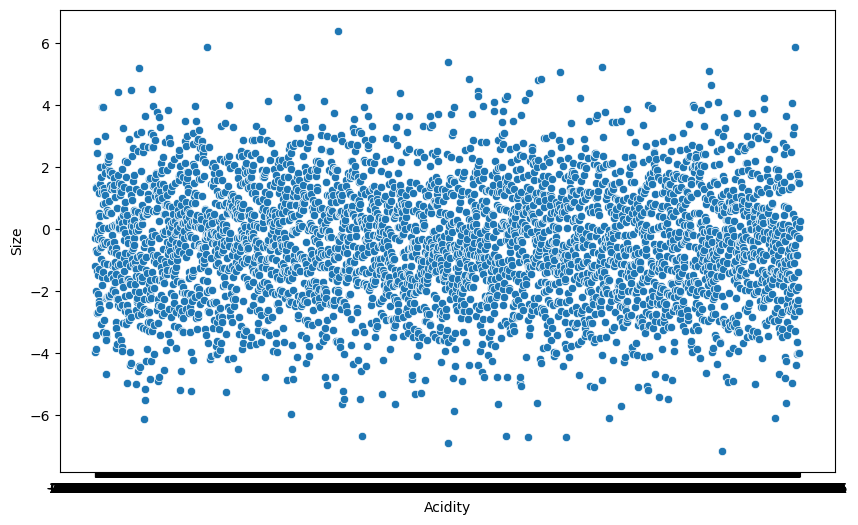

In [18]:
#Size vs Acidity
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Acidity',y='Size')
plt.show()

In [19]:
quality_dummies = pd.get_dummies(df['Quality'],dtype='int')
quality_dummies

,bad,good
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
3995,1,0
3996,0,1
3997,1,0
3998,0,1


In [20]:
df = pd.concat([df,quality_dummies],axis=1)
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,bad,good
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good,0,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good,0,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad,1,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good,0,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good,0,1


In [21]:
df= df.drop(['Quality'],axis=1)

In [22]:
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,bad,good
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,0,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,0,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,1,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,0,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,0,1


<Axes: >

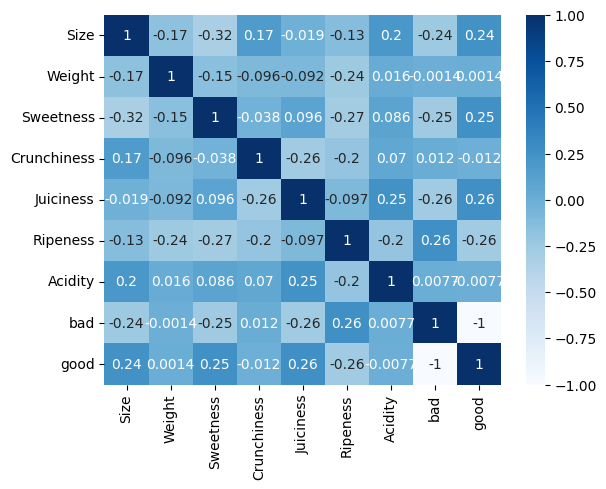

In [23]:
#Correlation between features using heatmap
sns.heatmap(df.corr(),annot=True,cmap='Blues')